In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#replaceing blanks with 0 as tenure is 0 and no of total charges are recorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum().sum()

0

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df["customerID"].duplicated().sum()

0

In [16]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#converted 0 and 1 values of senior citizen to yes/no to make it easier to under stand

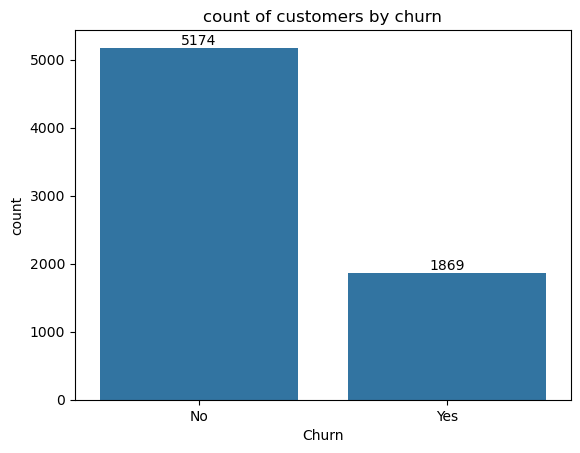

In [21]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

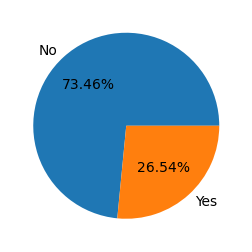

In [23]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index,autopct = "%1.2f%%")
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out. lets explore the reason behind it.

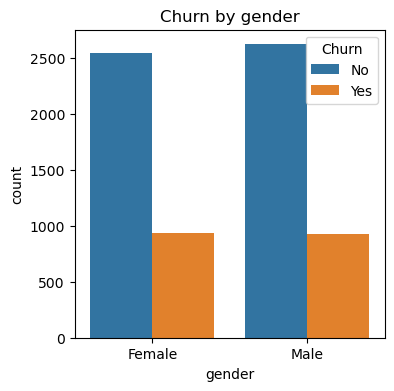

In [26]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender",data = df, hue= "Churn")
plt.title("Churn by gender")
plt.show()

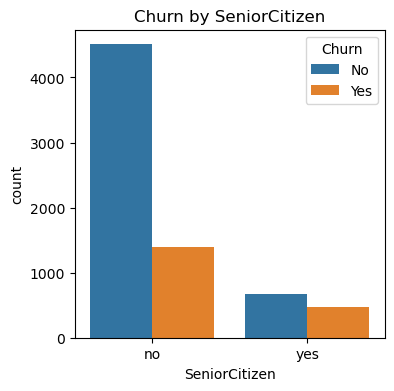

In [28]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen",data = df, hue= "Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

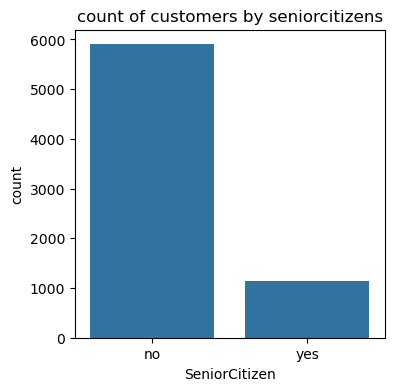

In [32]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen",data = df)
plt.title("count of customers by seniorcitizens")
plt.show()

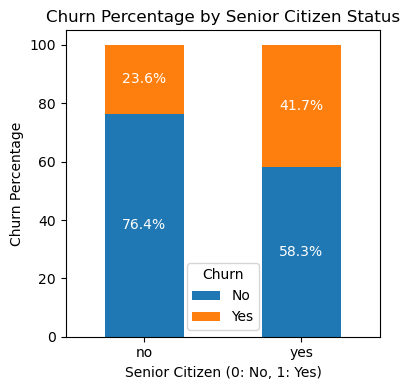

In [37]:
total_counts = df['SeniorCitizen'].value_counts()
churn_counts = df.groupby('SeniorCitizen')['Churn'].value_counts().unstack(fill_value=0)

churn_percentage = churn_counts.apply(lambda x: x / total_counts * 100, axis=0)

churn_percentage.plot(kind='bar', stacked=True, figsize=(4, 4))
plt.title('Churn Percentage by Senior Citizen Status')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Add percentage labels on the bars
for i, (name, row) in enumerate(churn_percentage.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        plt.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', color='white')
        bottom += value

plt.tight_layout()
plt.show()

# comparatatively a great porcentage of people in senior citizen catagory have churned

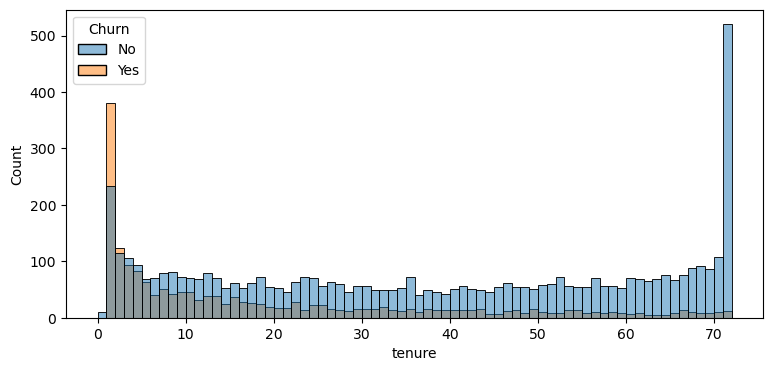

In [41]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df, bins = 72, hue = "Churn")
plt.show()

# people who have use our servises for a long time have stayedand people who have use our services have c hurned

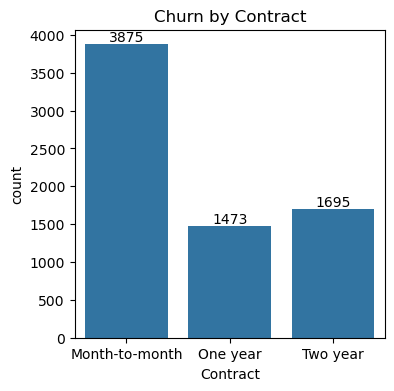

In [48]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract",data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract")
plt.show()

#people who have month to month contarct likely to churn then who have one or two years of contract

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

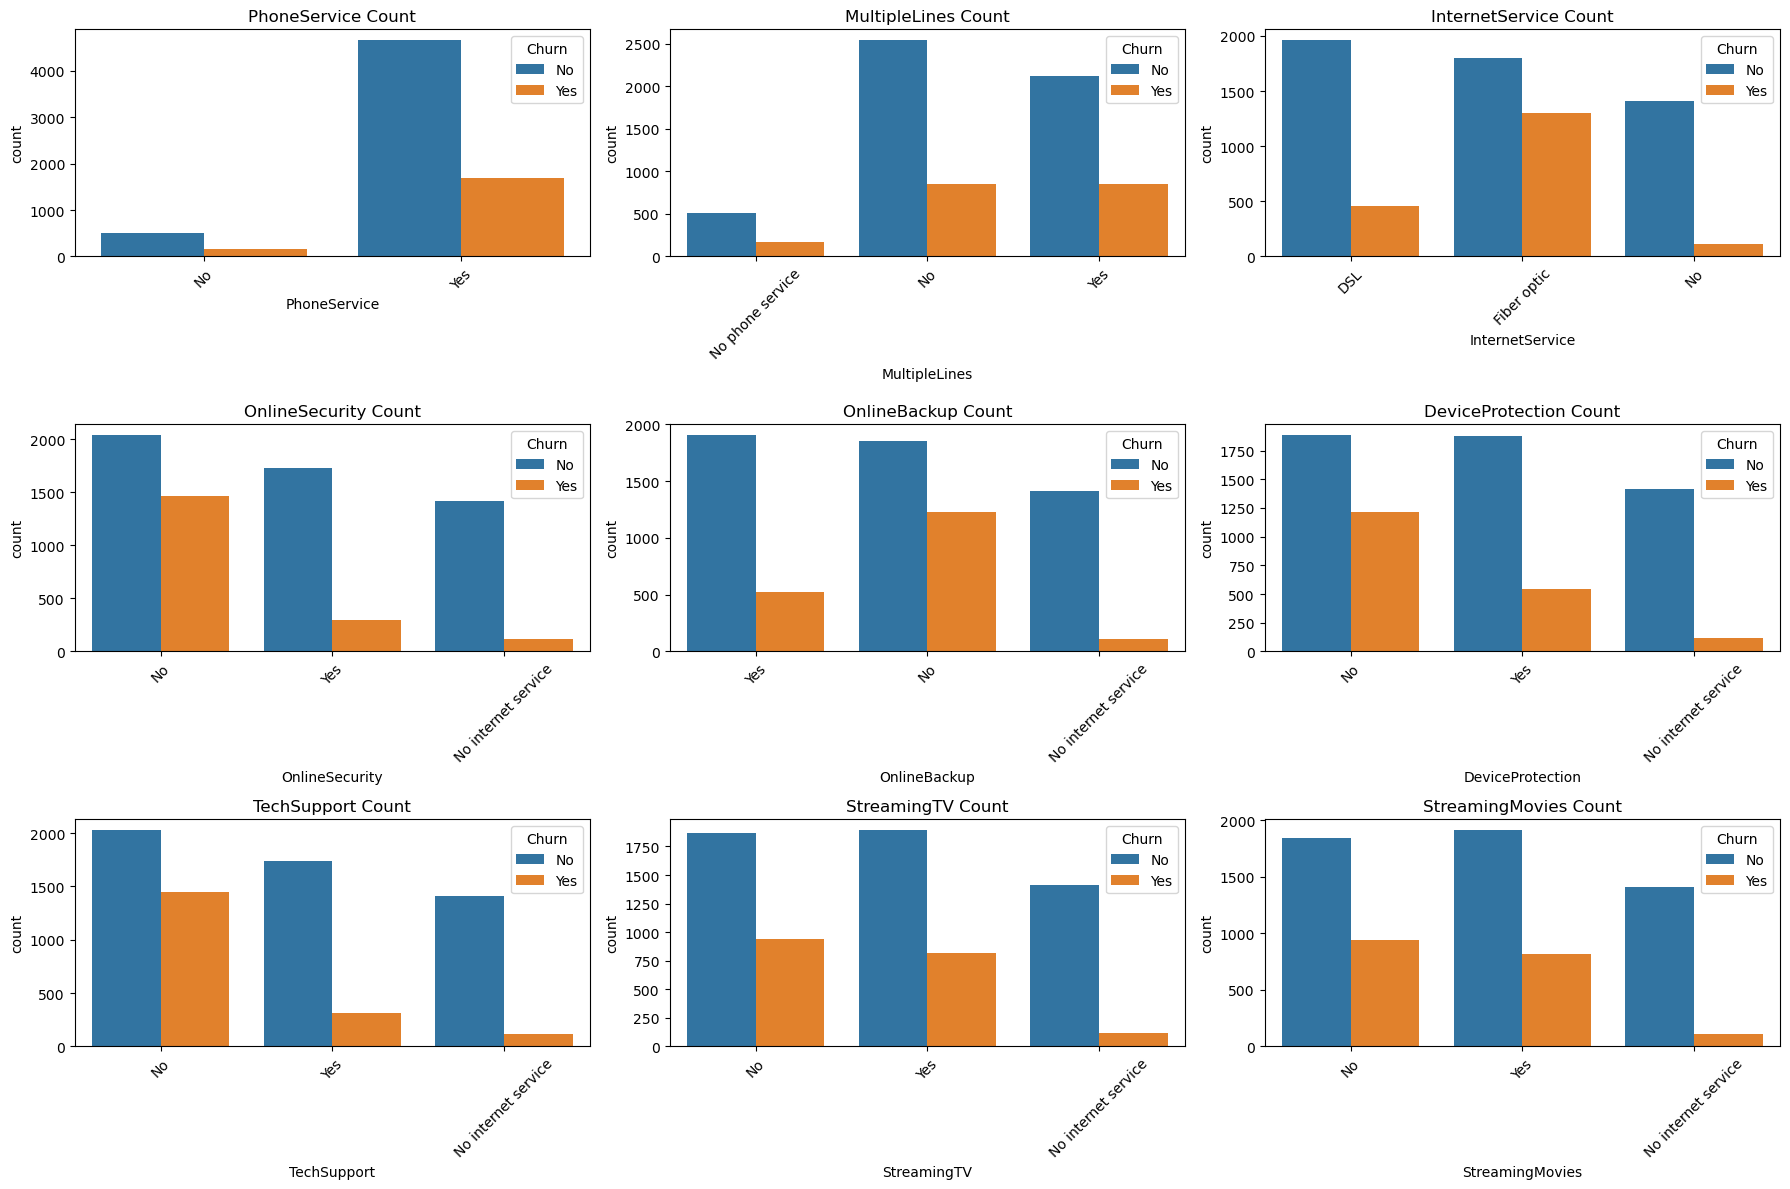

In [65]:
# Replace this with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# List of your categorical columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3 

# Set up the subplot grid — 3 rows, 3 cols (since you have 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through and plot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'{col} Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#Customers with 'No phone service' have a notably lower churn rate compared to those with phone service. For internet services, customers with 'Fiber optic' experience the highest churn, while those with 'No internet service' show the lowest churn. Similarly, customers without online security, online backup, device protection, or tech support tend to churn more than those who subscribe to these services.

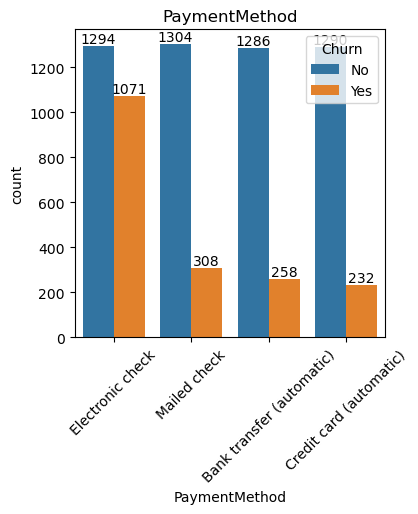

In [74]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "PaymentMethod",data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a paymant method